In [77]:
#Question-1:

import pandas as pd    # step 1:import pandas
#step 2: now import the data from given address
#step 3:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep = '|')
users.head()

#step 4:  Discover what is the mean age per occupation
users.groupby("occupation").age.mean()


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [83]:
#step 5: Discover the Male ratio per occupation and sort it from the most to the least

#applying filter to get gender male
def gender(var):
    if var == 'M':
        return True
    else:
        return False

users['maleOnly'] = users['gender'].apply(gender)

In [82]:
#Groupby male in each occupation and counting
male = users.groupby('occupation')['maleOnly'].sum()
 
#Groupby total people in each occupation and counting
total = users.groupby('occupation').gender.count()

 # to Find the ratio and sor them descending
ratio = male/total
ratioSort = ratio.sort_values(ascending = False)
ratioSort


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [84]:
#step 6: For each occupation, calculate the minimum and maximum ages
max = users.groupby('occupation').age.max()
#print(max)
min = users.groupby("occupation").age.min()
#print(min)
users.groupby("occupation").age.aggregate(['max','min'])


,max,min
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22
homemaker,50,20


In [85]:
#step 7: For each combination of occupation and sex, calculate the mean age
users.groupby(["occupation","gender"]).age.mean()


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [86]:
#step 8: For each occupation present the percentage of women and men
gen_count = users.groupby(["occupation","gender"]).aggregate({"gender":"count"}) #apply count to gender
occu_count = users.groupby(["occupation"]).count() # apply count to occupation

gen_occu = gen_count.div(occu_count, level = "occupation")
gen_occu.loc[:, "gender"]

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

In [87]:
#Question- 2:
import pandas as pd #step 1 : import library
import numpy as np

#step 2 : import data from the given address
#step 3: assign it to variable euro12
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [88]:
#Step 4: Select only the Goal column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [89]:
#Step 5: How many team participated in the Euro2012?
euro12.Team.nunique()

16

In [90]:
#step 6: What is the number of columns in the dataset?
euro12.shape[1]

35

In [91]:
#step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline =euro12[["Team","Yellow Cards","Red Cards"]]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [92]:
#step 8: Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by=["Red Cards","Yellow Cards"])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [93]:
#step 9:. Calculate the mean Yellow Cards given per Team
discipline["Yellow Cards"].mean()

7.4375

In [94]:
#step 10: . Filter teams that scored more than 6 goals
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [95]:
#step 11:Select the teams that start with G
euro12[euro12.Team.str.startswith("G")]



,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [96]:
#step 12:Select the first 7 columns
euro12.iloc[: ,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [97]:
#stwp 13: Select all columns except the last 3
euro12.iloc[: ,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [98]:
#step 14: Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.isin(["England","Italy","Russia"]), ["Shooting Accuracy","Team"]]

,Shooting Accuracy,Team
3,50.0%,England
7,43.0%,Italy
12,22.5%,Russia


In [103]:
#Question : 3
import random  #step 1: import libraries

# step 2: . Create 3 differents Series
series1 = pd.Series(np.random.randint(1,5,100))
print(series1)
series2 = pd.Series(np.random.randint(1,4,100))
print(series2)
series3 = pd.Series(np.random.randint(10000,30000,100))
print(series3)

0     3
1     3
2     4
3     2
4     4
     ..
95    4
96    2
97    1
98    4
99    4
Length: 100, dtype: int32
0     3
1     1
2     2
3     1
4     1
     ..
95    1
96    1
97    3
98    1
99    1
Length: 100, dtype: int32
0     27878
1     22923
2     19402
3     19431
4     15125
      ...  
95    23236
96    23560
97    29494
98    28564
99    22337
Length: 100, dtype: int32


In [106]:
#step 3: . Create a DataFrame by joinning the Series by column
dataframe = pd.concat([series1, series2, series3], axis=1)
print(dataframe)

    0  1      2
0   3  3  27878
1   3  1  22923
2   4  2  19402
3   2  1  19431
4   4  1  15125
.. .. ..    ...
95  4  1  23236
96  2  1  23560
97  1  3  29494
98  4  1  28564
99  4  1  22337

[100 rows x 3 columns]


In [109]:
#step 4: . Change the name of the columns to bedrs, bathrs, price_sqr_meter
dataframe.columns = ['bedrs','bathrs','price_sqr_meter']
print(dataframe)

    bedrs  bathrs  price_sqr_meter
0       3       3            27878
1       3       1            22923
2       4       2            19402
3       2       1            19431
4       4       1            15125
..    ...     ...              ...
95      4       1            23236
96      2       1            23560
97      1       3            29494
98      4       1            28564
99      4       1            22337

[100 rows x 3 columns]


In [110]:
#step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis = 0)
bigcolumn


0         3
1         3
2         4
3         2
4         4
      ...  
95    23236
96    23560
97    29494
98    28564
99    22337
Length: 300, dtype: int32

In [111]:
#step 6: Ops it seems it is going only until index 99. Is it true?
len(bigcolumn)  

'''yes'''

300

In [113]:
#step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.index = range(0, 300)
print(bigcolumn)

0          3
1          3
2          4
3          2
4          4
       ...  
295    23236
296    23560
297    29494
298    28564
299    22337
Length: 300, dtype: int32


In [216]:
#Question- 4:

import pandas as pd #step 1 : import library
import numpy as np
import datetime

#step 2: importing the data
#step 3: Assign it to variable data
data = pd.read_csv("wind.data.txt",sep="\s+",parse_dates=[[0,1,2]])
data.head()


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [ ]:
#step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it
def fixYears(var):
    if var.year > 1979:
        year=var.year-100
    else:
        year = var.year
    return datetime.date(year,var.month,var.day)

data["Yr_Mo_Dy"]=data["Yr_Mo_Dy"].apply(fixYears)
data.head()


In [ ]:
#step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data["Yr_Mo_Dy"]=pd.to_datetime(data["Yr_Mo_Dy"])
data=data.set_index('Yr_Mo_Dy')
data.head()

In [232]:
#step 6: Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [233]:
#step 7: Compute how many non-missing values there are in total
data.shape[0]-data.isnull().sum() 

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [234]:
#step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times
data.mean().mean() 


10.227982360836938

In [235]:
#step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard 
     #deviations of the windspeeds at each location over all the days

loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
print(loc_stats)

      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [236]:
#step 10:  Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard
          #deviations of the windspeeds across all the locations at each day

day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [237]:
#step 11: . Find the average windspeed in January for each location Treat January 1961 and January 1962 both as January.

data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
janWinds=data.query('month==1')
janWinds
janWinds.loc[:,'RPT':'MAL'].mean()


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [238]:
#step 12 : Downsample the record to a yearly frequency for each location.
data.query('month == 1 and day == 1') 

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


In [239]:
#step 13 : Downsample the record to a monthly frequency for each location
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


In [242]:
#step 14: Downsample the record to a weekly frequency for each location
data.resample('W').mean()

C:\Users\pkgan\AppData\Local\Temp\ipykernel_7804\2043818570.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.resample('W').mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000,1.000000,1961.0,1.000000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571,1.000000,1961.0,5.000000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286,1.000000,1961.0,12.000000
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286,1.000000,1961.0,19.000000
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000,1.000000,1961.0,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571,11.428571,1978.0,17.142857
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429,12.000000,1978.0,7.000000
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857,12.000000,1978.0,14.000000


In [244]:
#step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all
         #locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

data1961 = data[data.index < pd.to_datetime('1962-01-01')]
data1961.resample('W').mean()
data1961.resample('W').min()
data1961.resample('W').max()
data1961.resample('W').std()

C:\Users\pkgan\AppData\Local\Temp\ipykernel_7804\3173534679.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1961.resample('W').mean()
C:\Users\pkgan\AppData\Local\Temp\ipykernel_7804\3173534679.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1961.resample('W').std()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-08,2.631321,3.949525,1.604761,1.810743,3.251660,2.059546,1.872222,3.098404,1.722255,1.704941,4.349139,1.773062,0.000000,0.0,2.160247
1961-01-15,3.555392,3.148945,5.034959,3.549559,3.471726,3.251039,4.709309,3.936894,3.500975,4.084293,5.552215,4.692355,0.000000,0.0,2.160247
1961-01-22,5.337402,3.837785,5.086229,6.245541,3.612875,3.453432,5.166300,3.164990,4.169112,4.783952,3.626584,4.237239,0.000000,0.0,2.160247
1961-01-29,4.619061,5.170224,4.665843,4.301325,4.858116,3.749415,4.508449,4.436222,4.902057,3.713368,5.210726,3.874721,0.000000,0.0,2.160247
1961-02-05,5.251408,5.187395,3.975166,2.709106,2.334619,2.397066,2.423454,4.081158,2.802490,2.839501,4.210858,4.336104,0.487950,0.0,13.483676
1961-02-12,3.587677,3.608373,3.290303,2.262056,5.571108,3.048976,2.974059,3.022753,2.914760,1.746749,4.063753,1.828705,0.000000,0.0,2.160247
1961-02-19,5.064609,3.575012,4.196621,4.311569,2.321716,3.024078,4.958631,2.283444,2.560591,2.531361,5.910938,4.685377,0.000000,0.0,2.160247
1961-02-26,7.020716,5.147348,5.578470,4.482075,6.480712,5.029874,6.037916,4.869668,4.705163,4.920064,5.091162,6.182283,0.000000,0.0,2.160247


In [116]:
#Question 5:
import pandas as pd #step 1 : import library
import numpy as np
import seaborn as sns

#step 2: importinf the data
#step 3 assigning it to name chipo
chipo =pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [117]:
#step 4: See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [122]:
#step 5: What is the number of observations in the dataset?
len(chipo)


4622

In [123]:
#step 6: . What is the number of columns in the dataset?
chipo.shape[1]

# there is total 5 column.

5

In [124]:
#step 7: Print the name of all the columns.
for col_name in chipo.columns:
    print(col_name)

order_id
quantity
item_name
choice_description
item_price


In [126]:
#step 8: How is the dataset indexed?
chipo.index

#thr result shows the the values for the data strats from 0 and goes till 4662(which means it has 4662 rows)

RangeIndex(start=0, stop=4622, step=1)

In [128]:
#step 9: Which was the most-ordered item?
p=chipo.groupby("item_name").sum()
p=p.sort_values(["quantity"],ascending=False)
p.head(1)

    #chicken bowl is the most ordered item

#step 10: For the most-ordered item, how many items were ordered?
    #761 chichen bowl was ordered which was the maximum'''

C:\Users\pkgan\AppData\Local\Temp\ipykernel_7804\2702202332.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p=chipo.groupby("item_name").sum()


,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [130]:
#step 11: What was the most ordered item in the choice_description column?
c= chipo.groupby("choice_description").sum()
c = c.sort_values(["quantity"],ascending=False)
c.head(1)

#diet coke is the most ordered item in the choice description column

C:\Users\pkgan\AppData\Local\Temp\ipykernel_7804\1297268879.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c= chipo.groupby("choice_description").sum()


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [132]:
#step 12: How many items were orderd in total?
total_ordered =chipo.quantity.sum()
print(total_ordered)

4972


In [135]:
#step 13: Turn the item price into a float
def convert_to_float(num):
    return float(num[1:-1])    

In [136]:
#chipo.item_price.dtype
chipo.dtypes.item_price

dtype('O')

In [141]:
#Create a lambda function and change the type of item price
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))
chipo.item_price

TypeError: 'float' object is not subscriptable

In [142]:
#Check the item price type
chipo.dtypes.item_price

dtype('float64')

In [143]:
#step 14: How much was the revenue for the period in the dataset?

chipo['revenuebyItem'] = chipo['quantity']*chipo.item_price
totalReveneue = chipo.revenuebyItem.sum()
print(totalReveneue)

39237.02


In [144]:
#step 15:  How many orders were made in the period?
total_ordes = chipo.order_id.value_counts().sum()
total_ordes
'''total orders : 4662'''

'total orders : 4662'

In [146]:
#step 16: What is the average revenue amount per order?
chipo.groupby(by=['order_id']).sum().mean()['revenuebyItem']


C:\Users\pkgan\AppData\Local\Temp\ipykernel_7804\1025816930.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby(by=['order_id']).sum().mean()['revenuebyItem']


21.39423118865867

In [187]:
#step 17: How many different items are sold?
chipo.item_name.value_counts().count()

50

In [47]:
#Question 6: Create a line plot showing the number of marriages and divorces per capita in the
             #U.S. between 1867 and 2014. Label both lines and show the legend.
             #Don't forget to label your axes!
import pandas as pd  #step 1: import library
import matplotlib.pyplot as plt

#step 2 : import data
#step 3 : assign to data
data = pd.read_csv("us-marriages-divorces-1867-2014 (2).csv")
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


<Figure size 640x480 with 0 Axes>

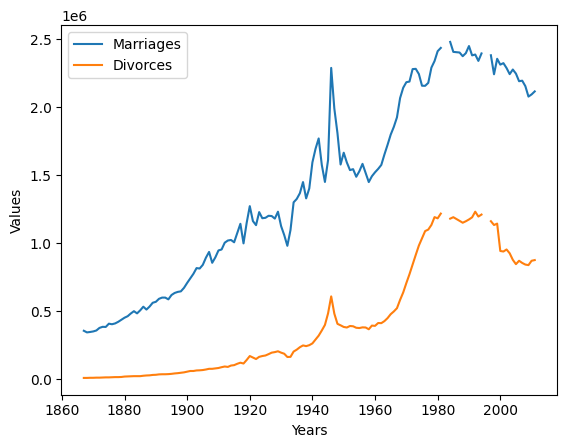

In [48]:
plt.figure()
data.plot('Year',y=['Marriages','Divorces'])
plt.ylabel('Values')
plt.xlabel("Years")
plt.show()


In [147]:
#Question 7: Create a vertical bar chart comparing the number of marriages and divorces per
            #capita in the U.S. between 1900, 1950, and 2000.
            #Don't forget to label your axes!

#step 1 : import libraries
import numpy as np
import matplotlib.pyplot as plt

#step 2:Loading data
data = pd.read_csv("us-marriages-divorces-1867-2014 (2).csv")
data.head()

data_of_3years = data[data['Year'].apply(lambda x: x in [1900, 1950, 2000])]
marriages = data_of_3years['Marriages_per_1000'].values
divorces = data_of_3years['Divorces_per_1000'].values


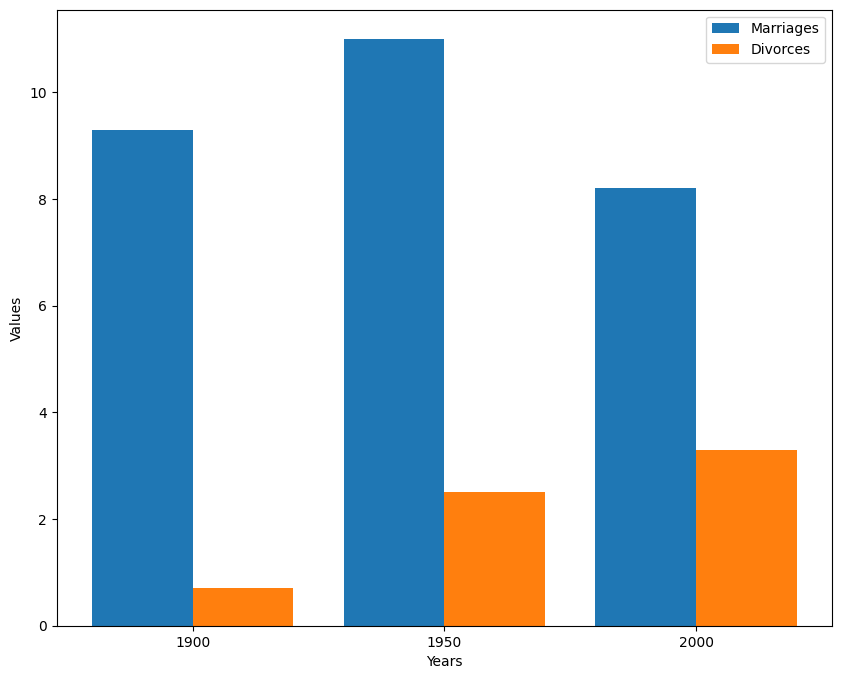

In [148]:
X = ['1900', '1950', '2000']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, marriages, 0.4, label = 'Marriages')
plt.bar(X_axis + 0.2, divorces, 0.4, label = 'Divorces')
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Values")
plt.legend()

plt.show()

In [149]:
#Question 8: Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
             #the actors by their kill count and label each bar with the corresponding actor's name.
             #Don't forget to label your axes!

#step 1: importlibraries
import numpy as np
import matplotlib.pyplot as plt

#step 2: import data
data = pd.read_csv('actor_kill_counts.csv')
data.head()



,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


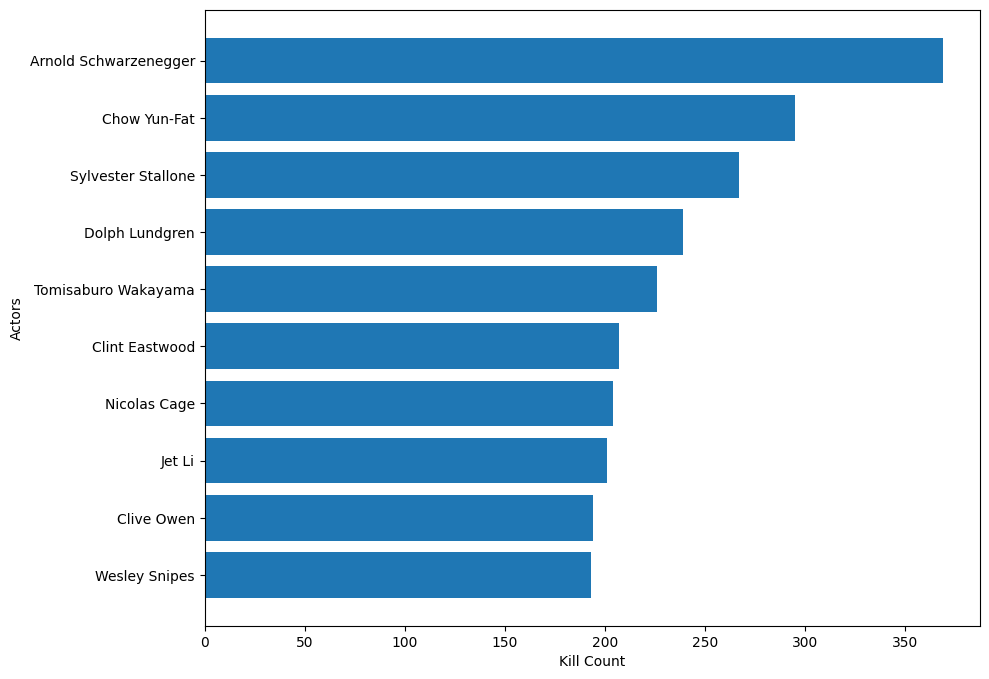

In [153]:
#step 3: creating a bar chart
content = data.sort_values('Count', ascending = True)
actorNames = content['Actor'].values
kills = content['Count'].values

plt.barh(actorNames, kills)
plt.ylabel("Actors")
plt.xlabel("Kill Count")
plt.show()

In [154]:
#Question 9: Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
            #Make sure that the pie chart is an even circle, labels the categories, and shows the
            #percentage breakdown of the categories

#step 1: import libraries
import numpy as np
import matplotlib.pyplot as plt

# step 2: import data
data = pd.read_csv("roman-emperor-reigns.csv")
data.head()


,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


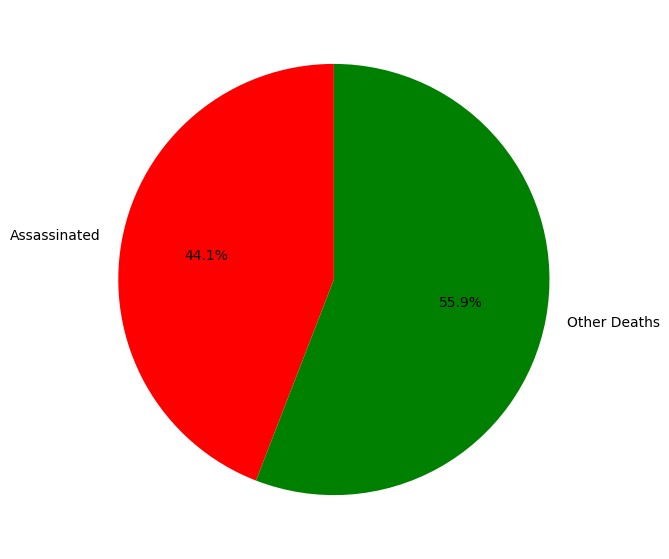

In [155]:
killedEmperors = data[data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
killedEmperors.head()

fig = plt.figure(figsize =(10, 7))
colors=['red', 'green']
plt.pie([len(killedEmperors),len(data) - len(killedEmperors)], labels = ['Assassinated', 'Other Deaths'],  colors=colors, startangle=90, autopct='%1.1f%%')
 
plt.show()

In [64]:
#Question 10: Create a scatter plot showing the relationship between the total revenue earned by
              #arcades and the number of Computer Science PhDs awarded in the U.S. between 

#step 1: importl ibraries
import numpy as np
import matplotlib.pyplot as plt

#step 2: load data
content = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
content.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [ ]:
arcadeRevenue = content['Total Arcade Revenue (billions)'].values
csDocAwardes = content['Computer Science Doctorates Awarded (US)'].values


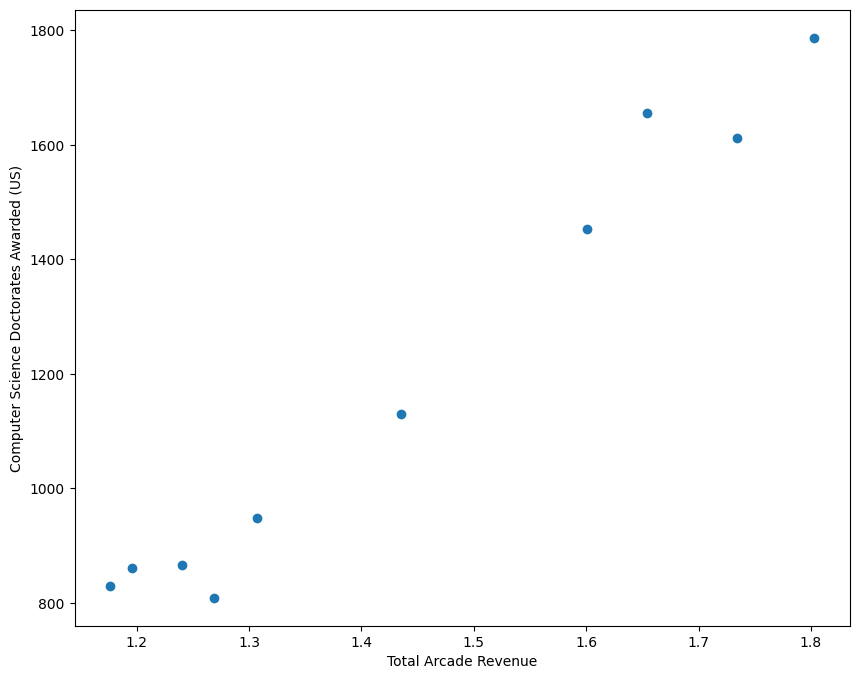

In [161]:
plt.scatter(arcadeRevenue, csDocAwardes)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.xlabel('Total Arcade Revenue')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.show()